In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [150]:
plt.rcParams["figure.figsize"] = (10,5)

In [151]:
cyc = pd.read_csv('london_merged.csv')

In [152]:
cyc.shape

(17414, 10)

In [153]:
cyc.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [154]:
cyc[cyc['weather_code'] == 7.0].shape

(2141, 10)

In [155]:
cyc[cyc['weather_code'] == 7.0].head(60)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
56,2015-01-06 08:00:00,3534,9.0,7.0,82.0,12.0,7.0,0.0,0.0,3.0
57,2015-01-06 09:00:00,1573,9.0,6.5,87.0,16.0,7.0,0.0,0.0,3.0
60,2015-01-06 12:00:00,395,11.0,11.0,85.0,19.0,7.0,0.0,0.0,3.0
92,2015-01-07 21:00:00,516,10.0,7.0,82.0,27.0,7.0,0.0,0.0,3.0
93,2015-01-07 22:00:00,414,10.0,7.0,82.0,27.0,7.0,0.0,0.0,3.0
94,2015-01-07 23:00:00,206,10.0,7.0,85.0,24.0,7.0,0.0,0.0,3.0
99,2015-01-08 04:00:00,32,12.0,12.0,88.0,20.5,7.0,0.0,0.0,3.0
100,2015-01-08 05:00:00,87,12.0,12.0,80.0,20.5,7.0,0.0,0.0,3.0
102,2015-01-08 07:00:00,982,10.5,9.5,82.5,17.0,7.0,0.0,0.0,3.0
103,2015-01-08 08:00:00,1228,9.5,7.5,87.5,14.0,7.0,0.0,0.0,3.0


In [156]:
cyc.weather_code.unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

In [157]:
cyc.columns[cyc.isnull().any()]

Index([], dtype='object')

In [158]:
cyc['timestamp'] = pd.to_datetime(cyc['timestamp'])

In [159]:
cyc['year'] = cyc['timestamp'].dt.year
cyc['month'] = cyc['timestamp'].dt.month
cyc['date'] = cyc['timestamp'].dt.day
cyc['hour'] = cyc['timestamp'].dt.hour
cyc['dayOfWeek'] = cyc['timestamp'].dt.day_name()

In [160]:
cyc.drop(columns=['timestamp'], inplace=True)

In [161]:
cyc.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,date,hour,dayOfWeek
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,Sunday
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,Sunday
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,Sunday
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,Sunday
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,Sunday


In [162]:
dayOfWeekDict = {
    'Sunday' : 0,
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6    
}

In [163]:
cyc['dayOfWeek'] = cyc['dayOfWeek'].map(dayOfWeekDict)
cyc.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,date,hour,dayOfWeek
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,0


In [164]:
cyc.dayOfWeek.skew()

0.010264410743544535

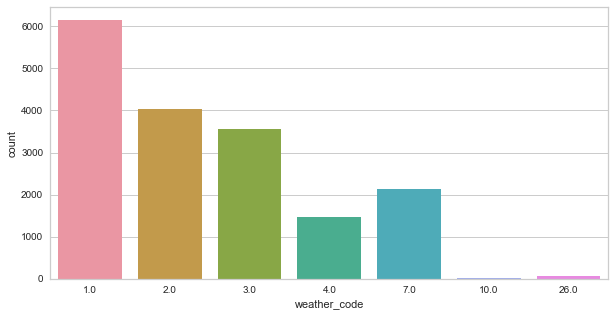

In [165]:
sns.countplot(x='weather_code',data=cyc)

In [166]:
cyc.drop(columns=['year'], inplace=True)

In [167]:
cyc.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,date,hour,dayOfWeek
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,0,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1,0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,2,0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,3,0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,4,0


In [168]:
cyc[cyc['hum'] >= 100.0].shape

(100, 13)

In [169]:
cyc.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
month             int64
date              int64
hour              int64
dayOfWeek         int64
dtype: object

In [170]:
cyc.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [171]:
cyc.wind_speed.describe()

count    17414.000000
mean        15.913063
std          7.894570
min          0.000000
25%         10.000000
50%         15.000000
75%         20.500000
max         56.500000
Name: wind_speed, dtype: float64

In [172]:
cyc.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,date,hour,dayOfWeek
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,0,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1,0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,2,0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,3,0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,4,0


In [173]:
cyc[(cyc['is_holiday']==0) & (cyc['is_weekend']==0)].shape

(12060, 13)

In [174]:
cyc[(cyc['is_holiday']==0) & (cyc['is_weekend']==1)].shape

(4970, 13)

In [175]:
cyc[(cyc['is_holiday']==1) & (cyc['is_weekend']==0)].shape

(384, 13)

In [176]:
cyc[(cyc['is_holiday']==1) & (cyc['is_weekend']==1)].shape

(0, 13)

In [177]:
numeric_columns = ['cnt', 't1', 't2', 'hum', 'wind_speed']
categorical_columns = ['weather_code', 'is_holiday', 'is_weekend', 'season', 'month', 'date', 'hour', 'dayOfWeek']

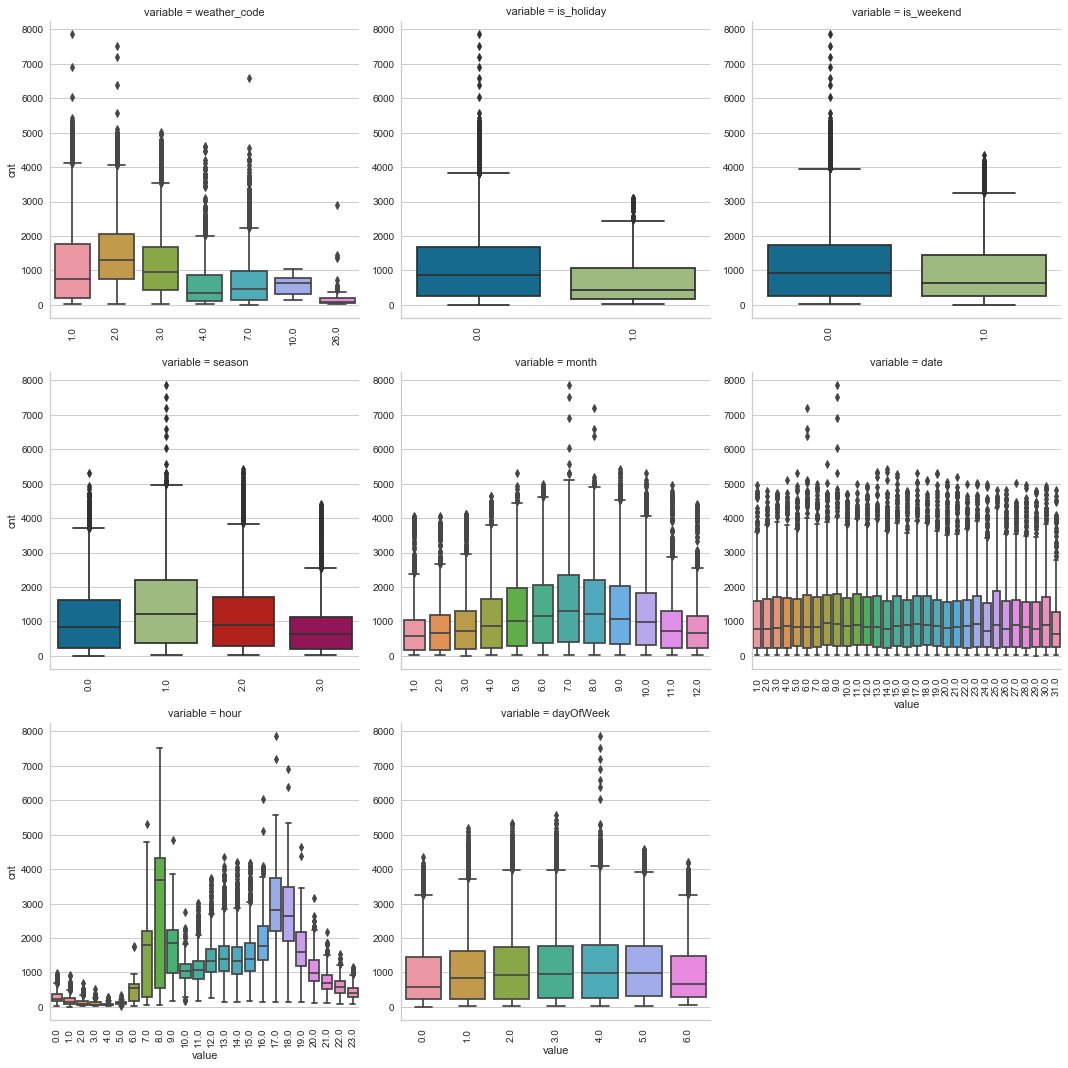

In [178]:
#Categorical variables vs target variable
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(cyc, id_vars=['cnt'], value_vars=categorical_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g.map(boxplot, "value", "cnt")

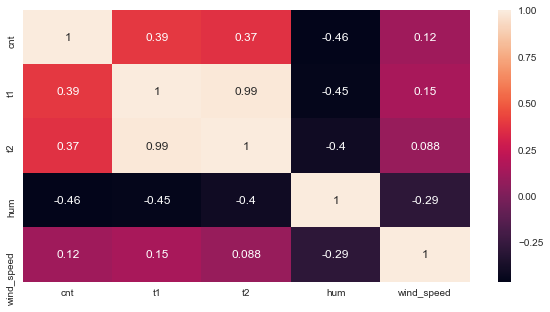

In [179]:
corr = cyc[numeric_columns].corr()
#fig, ax = plt.subplots(figsize=(15,15))
#sns.heatmap(corr, annot=True, ax = ax)
sns.heatmap(corr, annot=True)

In [180]:
print(cyc.cnt.skew(), cyc.t1.skew(), cyc.t2.skew(), cyc.hum.skew(), cyc.wind_speed.skew())

1.3257068020782177 0.2038623650886739 -0.058352196865218336 -0.57278192116473 0.6690112547016851


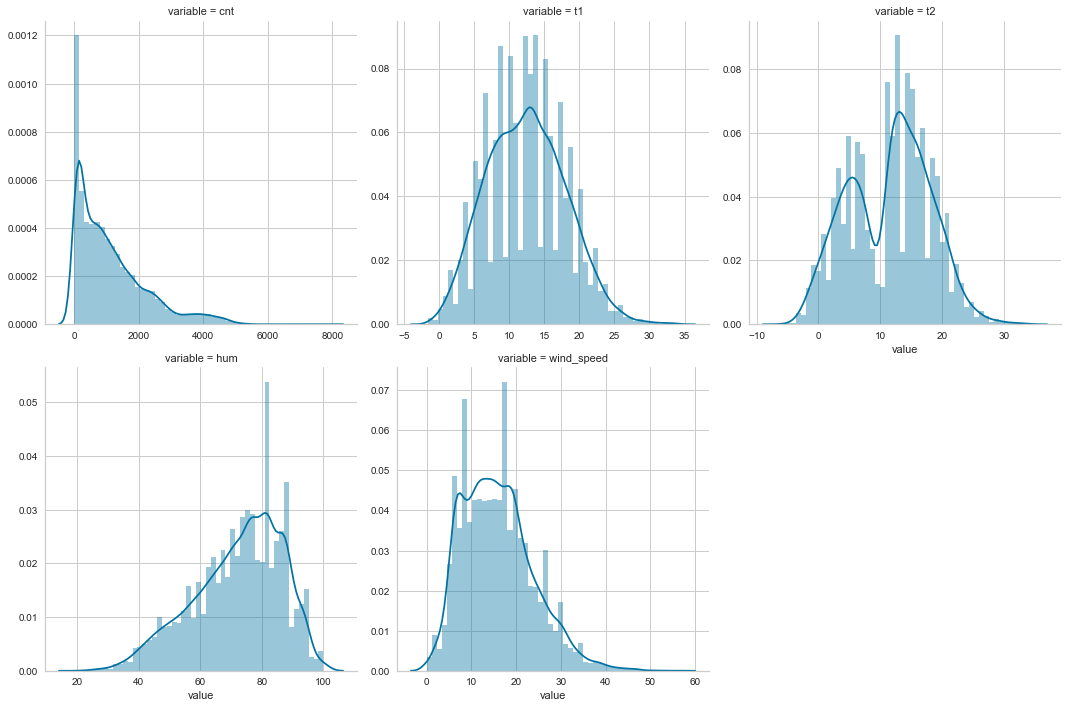

In [181]:
f = pd.melt(cyc, value_vars=numeric_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height = 5)
g = g.map(sns.distplot, "value")

In [182]:
for col in categorical_columns:
    cyc[col] = cyc[col].astype('category')

In [183]:
cyc.dtypes

cnt                int64
t1               float64
t2               float64
hum              float64
wind_speed       float64
weather_code    category
is_holiday      category
is_weekend      category
season          category
month           category
date            category
hour            category
dayOfWeek       category
dtype: object

In [184]:
cyc2 = cyc.copy()

In [185]:
cyc2.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,date,hour,dayOfWeek
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,0,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1,0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,2,0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,3,0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,4,0


In [186]:
cyc.drop(columns=['t1'], inplace=True)

In [187]:
from sklearn.preprocessing import power_transform
cyc['wind_speed2'] = power_transform(cyc[['wind_speed']], method='yeo-johnson')
cyc['wind_speed2'].skew()

-0.011078796378709777

In [188]:
#cyc['hum2'] = np.power(cyc['hum'],3)
#cyc['hum2'].skew()

In [189]:
from sklearn.preprocessing import power_transform
cyc['hum2'] = power_transform(cyc[['hum']], method='yeo-johnson')
cyc['hum2'].skew()

-0.12788612049955164

In [190]:
cyc.drop(columns=['wind_speed'], inplace=True)

In [191]:
cyc.drop(columns=['hum'], inplace=True)

In [192]:
from sklearn.preprocessing import power_transform
cyc['cnt2'] = power_transform(cyc[['cnt']], method='yeo-johnson')
cyc['cnt2'].skew()

-0.1049629764077983

In [193]:
cyc.drop(columns=['cnt'], inplace=True)

In [194]:
cyc.head()

,t2,weather_code,is_holiday,is_weekend,season,month,date,hour,dayOfWeek,wind_speed2,hum2,cnt2
0,2.0,3.0,0.0,1.0,3.0,1,4,0,0,-1.389869,1.642211,-1.029707
1,2.5,1.0,0.0,1.0,3.0,1,4,1,0,-1.594069,1.642211,-1.188955
2,2.5,1.0,0.0,1.0,3.0,1,4,2,0,-3.121506,1.984719,-1.205216
3,2.0,1.0,0.0,1.0,3.0,1,4,3,0,-3.121506,2.340629,-1.520936
4,0.0,1.0,0.0,1.0,3.0,1,4,4,0,-1.293413,1.642211,-1.709529


In [195]:
print(cyc.cnt2.skew(), cyc.t2.skew(), cyc.hum2.skew(), cyc.wind_speed2.skew())

-0.1049629764077983 -0.058352196865218336 -0.12788612049955164 -0.011078796378709777


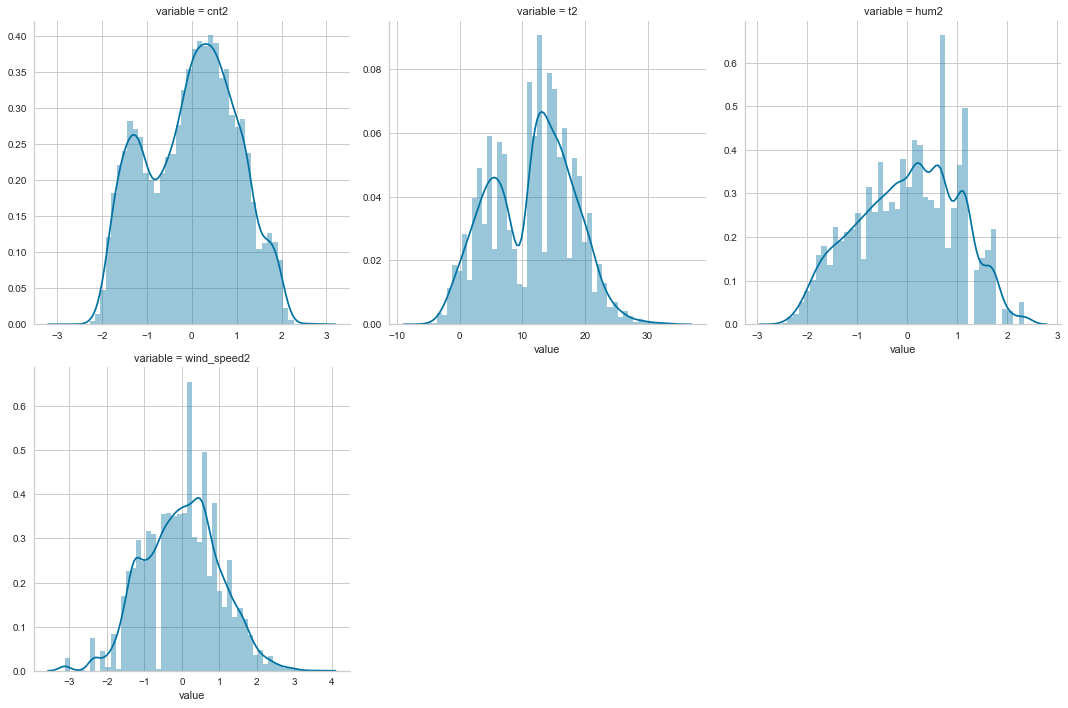

In [196]:
numeric_columns2 = ['cnt2',  't2', 'hum2', 'wind_speed2']
f = pd.melt(cyc, value_vars=numeric_columns2)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height = 5)
g = g.map(sns.distplot, "value")

In [197]:
targets = cyc['cnt2']
cyc.drop(columns=['cnt2'], inplace=True)
cyc.head()

,t2,weather_code,is_holiday,is_weekend,season,month,date,hour,dayOfWeek,wind_speed2,hum2
0,2.0,3.0,0.0,1.0,3.0,1,4,0,0,-1.389869,1.642211
1,2.5,1.0,0.0,1.0,3.0,1,4,1,0,-1.594069,1.642211
2,2.5,1.0,0.0,1.0,3.0,1,4,2,0,-3.121506,1.984719
3,2.0,1.0,0.0,1.0,3.0,1,4,3,0,-3.121506,2.340629
4,0.0,1.0,0.0,1.0,3.0,1,4,4,0,-1.293413,1.642211


In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cyc, targets, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(12189, 11)
(5225, 11)


In [199]:
from sklearn.metrics import mean_squared_error
def rmse(expected, predicted):
    return np.sqrt(mean_squared_error(expected, predicted))

In [200]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
r2score = lr.score(X_train, y_train)
train_pred = lr.predict(X_train)
print('R2score:', r2score, 'RMSE:', rmse(y_train, train_pred))

R2score: 0.42382602443773376 RMSE: 0.7605397515709167


In [201]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error
print('R2score:', r2_score(y_test, y_pred), 'RMSE:', rmse(y_test, y_pred))

R2score: 0.4216553390110753 RMSE: 0.757022769637169


In [230]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=7, random_state=10)
dtr.fit(X_train, y_train)
train_pred = dtr.predict(X_train)
print('R2score:', r2_score(y_train, train_pred), 'RMSE:', rmse(y_train, train_pred))

R2score: 0.8958568497234836 RMSE: 0.3233407599498951


In [231]:
y_pred = dtr.predict(X_test)
print('R2score:', r2_score(y_test, y_pred), 'RMSE:', rmse(y_test, y_pred))

R2score: 0.8901584796872845 RMSE: 0.3299125561238735
